In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk(r'C:\Users\ACER\MIAS\all-mias'):
    for filename in filenames:
        print(os.path.join)

<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function join at 0x0000024D6F4611F0>
<function jo

In [1]:
import cv2
no_angles = 360
url = r'C:\Users\ACER\MIAS\all-mias'

In [3]:
def save_dictionary(path,data):
    print('saving catalog...')
    #open('u.item', encoding="utf-8")
    import json
    with open(path,'w') as outfile:
      json.dump(str(data), fp=outfile)
      # save to file:
    print(' catalog saved')

In [2]:
def read_image():
    print("Reading images")
    import cv2
    info = {}
    for i in range(322):
        if i<9:
            image_name='mdb00'+str(i+1)
        elif i<99:
            image_name='mdb0'+str(i+1)
        else:
            image_name = 'mdb' + str(i+1)
#         print(image_name)
        image_address = url + '\\' + image_name + '.pgm'
#         print(image_address)
        img = cv2.imread(image_address, 0)
        # print(i)
        try:
            img = cv2.resize(img, (64,64))   #resize image
            rows, cols = img.shape
            info[image_name]={}
            for angle in range(0, 360, 18):
                M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
                img_rotated = cv2.warpAffine(img, M, (cols, rows))
                info[image_name][angle]=img_rotated
        except:
            print("except")
    return (info)

In [3]:
def read_label():
    print("Reading labels")
    filename = url+'\\Info.txt'
    text_all = open(filename).read()
    #print(text_all)
    lines=text_all.split('\n')
    info={}
    for line in lines:
        words=line.split(' ')
        if len(words)>3:
            if (words[3] == 'B' or words[3] == 'M'):
                info[words[0]] = {}
            for angle in range(0, 360, 18):
                info[words[0]][angle] = 1
        elif (len(words) == 3):
            if(words[2] == 'NORM'):
                info[words[0]] = {}
            for angle in range(0, 360, 18):
                info[words[0]][angle] = 0
    return (info)

In [5]:
from sklearn.model_selection import train_test_split
label_info=read_label()
image_info=read_image()
# print(image_info[1][0])
ids=label_info.keys()   #ids = acceptable labeled ids
print(ids)
print(type(ids))
del label_info['Truth-Data:']
# print(label_info)
# print(ids)
# print(image_info)
X=[]
Y=[]
for id in ids:
    for angle in range(no_angles):
        X.append(image_info[id][angle])
        Y.append(label_info[id][angle])
X=np.array(X)
Y=np.array(Y)

Reading labels
Reading images
dict_keys(['Truth-Data:', 'mdb001', 'mdb002', 'mdb005', 'mdb010', 'mdb012', 'mdb013', 'mdb015', 'mdb017', 'mdb019', 'mdb021', 'mdb023', 'mdb025', 'mdb028', 'mdb030', 'mdb032', 'mdb058', 'mdb059', 'mdb063', 'mdb069', 'mdb072', 'mdb075', 'mdb080', 'mdb081', 'mdb083', 'mdb090', 'mdb091', 'mdb092', 'mdb095', 'mdb097', 'mdb099', 'mdb102', 'mdb104', 'mdb105', 'mdb107', 'mdb110', 'mdb111', 'mdb115', 'mdb117', 'mdb120', 'mdb121', 'mdb124', 'mdb125', 'mdb126', 'mdb127', 'mdb130', 'mdb132', 'mdb134', 'mdb141', 'mdb142', 'mdb144', 'mdb145', 'mdb148', 'mdb150', 'mdb152', 'mdb155', 'mdb158', 'mdb160', 'mdb163', 'mdb165', 'mdb167', 'mdb170', 'mdb171', 'mdb175', 'mdb178', 'mdb179', 'mdb181', 'mdb184', 'mdb186', 'mdb188', 'mdb190', 'mdb191', 'mdb193', 'mdb195', 'mdb198', 'mdb199', 'mdb202', 'mdb204', 'mdb206', 'mdb207', 'mdb209', 'mdb211', 'mdb212', 'mdb213', 'mdb214', 'mdb216', 'mdb218', 'mdb219', 'mdb222', 'mdb223', 'mdb226', 'mdb227', 'mdb231', 'mdb233', 'mdb236', 'mdb

In [ ]:
image_info.items()

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
(a,b,c)=x_train.shape
x_train = np.reshape(x_train, (a, b, c, 1))  #1 for gray scale
(a, b, c)=x_test.shape
x_test = np.reshape(x_test, (a, b, c, 1))   #1 for gray scale
print(x_train.shape)
print(x_test.shape)

(33120, 64, 64)
(8280, 64, 64)
(33120,)
(8280,)
(33120, 64, 64, 1)
(8280, 64, 64, 1)


In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics

In [62]:
rows, cols,color = x_train[0].shape
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='valid', strides=(1, 1),input_shape=(rows,cols,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='valid', strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0

In [63]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', patience=5,restore_best_weights=True, verbose=1)

In [64]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,validation_split=0.2, epochs=100, batch_size=128,callbacks=[es])
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

#print(model.predict(x_test))
#model.save('breast_cance_model.h5')

save_dictionary('history1.dat', history.history)

Epoch 1/100
207/207 [==============================] - 1013s 5s/step - loss: 1.0146 - accuracy: 0.5291 - val_loss: 0.6819 - val_accuracy: 0.5636
Epoch 2/100
207/207 [==============================] - 692s 3s/step - loss: 0.6670 - accuracy: 0.5877 - val_loss: 0.6398 - val_accuracy: 0.6229
Epoch 3/100
207/207 [==============================] - 518s 3s/step - loss: 0.6279 - accuracy: 0.6277 - val_loss: 0.6096 - val_accuracy: 0.6460
Epoch 4/100
207/207 [==============================] - 495s 2s/step - loss: 0.5994 - accuracy: 0.6492 - val_loss: 0.5746 - val_accuracy: 0.6810
Epoch 5/100
207/207 [==============================] - 517s 2s/step - loss: 0.5701 - accuracy: 0.6755 - val_loss: 0.5513 - val_accuracy: 0.6914
Epoch 6/100
207/207 [==============================] - 508s 2s/step - loss: 0.5374 - accuracy: 0.7016 - val_loss: 0.5153 - val_accuracy: 0.7213
Epoch 7/100
207/207 [==============================] - 506s 2s/step - loss: 0.5099 - accuracy: 0.7232 - val_loss: 0.4941 - val_accuracy

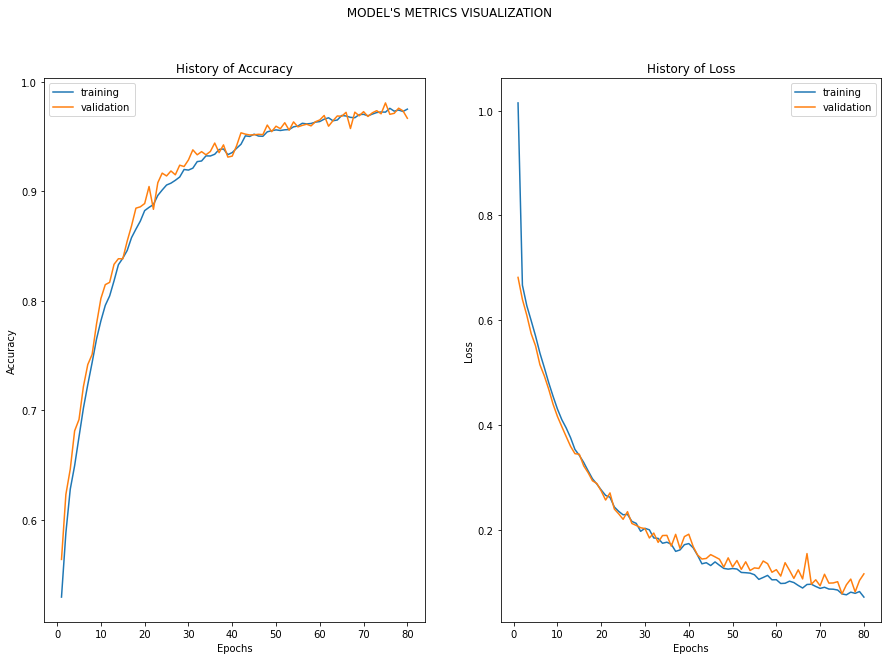

In [65]:
#%% PLOTTING RESULTS (Train vs Validation)
import matplotlib.pyplot as plt
def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,10))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'])

In [66]:
y_pred=model.predict(x_test)
y_pred_prb=model.predict_proba(x_test)
print(y_test)
print(y_pred)
y_pred=[1 if x[0]>0.7 else 0 for x in y_pred]
# print(y_pred)

Instructions for updating:
Please use `model.predict()` instead.
[1 0 0 ... 0 1 0]
[[9.99934435e-01]
 [6.95301821e-07]
 [6.60532296e-01]
 ...
 [1.01673904e-04]
 [1.00000000e+00]
 [1.27196312e-04]]


In [67]:
from sklearn import metrics
target=["B","M"]
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred),4))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred, average='weighted'),4))
print('Recall:', np.round(metrics.recall_score(y_test,y_pred, average='weighted'),4))
print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred, average='weighted'),4))
print('ROC AUC Score:', np.round(metrics.roc_auc_score(y_test, y_pred_prb,multi_class='ovo', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, y_pred),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred,target_names=target))

Accuracy: 0.9746
Precision: 0.9748
Recall: 0.9746
F1 Score: 0.9746
ROC AUC Score: 0.9966
Cohen Kappa Score: 0.9485
		Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98      4602
           M       0.98      0.96      0.97      3678

    accuracy                           0.97      8280
   macro avg       0.98      0.97      0.97      8280
weighted avg       0.97      0.97      0.97      8280

